# Projet 5 Gestion de données d'une boutique en ligne

# Importation des librairies + données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Erp = pd.read_csv('erp.csv', sep =';')
Liaison = pd.read_csv('liaison.csv', sep =';')
Web = pd.read_csv('web.csv', sep =';')

# Analyse des doublons et exploration des données

In [2]:
# Créons une fonction qui permet de tester s'il y a des doublons dans une colonne du dataframe
# et permet de réssumer les principales informations du dataframe

def Test_doublons(Machin, Nom_col):
    # On calcul le nbre d'élément au début et après suppression des doublons
    a = Machin.size
    b = Machin.drop_duplicates(Nom_col).size
    c = a - b
    d = Machin[Nom_col].count()
    
    # On calcul le Nbre de lignes au début et après suppression des doublons
    a2 = Machin[Nom_col].count()
    b2= Machin[Nom_col].drop_duplicates().count()
    c2 = a2 - b2
    
    if c2 == 0:
        print(f"Il n'y a pas de doublons dans le dataframe testé et il y {a} éléments dans le dataframe pour {d} lignes")

    else:
        print("ATTENTION Il y a des doublons dans le dataframe testé ! ")
        print(f"Au total en supprimant les doublons on va supprimer {c2} lignes sur {a2} lignes au total soit {(b2/a2*100).round(2)} % de lignes concervées")
        print(f"Il y aura en supprimant les doublons {c} éléments en doublons sur {a} éléments soit {(b/a*100).round(2)} % d'éléments concervés")
        
    

In [3]:
Erp.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
# Testons les doublons dans ce dataframe par rapport à la clef du produit

Test_doublons(Erp, "product_id")


Il n'y a pas de doublons dans le dataframe testé et il y 4125 éléments dans le dataframe pour 825 lignes


In [5]:
Web.head(5)

,SKU,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,1,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,2,0,0,0,0.0,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [6]:
# Après une analyse de la pertinence de chaque colonne je décide de ne pas concerver certaines colonnes qui ne possèdent
# qu'une unique valeur

Web.columns

Index(['SKU', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [7]:
# Prise en compte que des colonnes intéressantes de Web dans le nouveau dataframe Web2

Web2 = Web.loc[:,['SKU',
          'total_sales',
          'tax_status',
          'tax_class',
          'post_author', 
          'post_date',
          'post_date_gmt',
          'post_title', 
          'post_excerpt',
          'post_name', 
          'post_modified', 
          'post_modified_gmt',
          'guid', 
          'post_type']]

In [8]:
Web2.head(5)

# On voit qu'il y a des Nan

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
1,2,10.0,NaN,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
2,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,38,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,NaN,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/wp-content/uploads/...,attachment
4,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product


In [9]:
# Testons les doublons dans ce dataframe par rapport à la clef du produit web SKU

Test_doublons(Web2, "SKU")


ATTENTION Il y a des doublons dans le dataframe testé ! 
Au total en supprimant les doublons on va supprimer 713 lignes sur 1428 lignes au total soit 50.07 % de lignes concervées
Il y aura en supprimant les doublons 11158 éléments en doublons sur 21182 éléments soit 47.32 % d'éléments concervés


In [10]:
Liaison.head(5)

,product_id,SKU,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,3847,15298,NaN,NaN,NaN
1,3849,15296,NaN,NaN,NaN
2,3850,15300,NaN,NaN,NaN
3,4032,19814,NaN,NaN,NaN
4,4039,19815,NaN,NaN,NaN


In [11]:
# J'ai 3 colonnes supplémentaires qui se sont ajoutées vides que je ne vais pas conserver

Liaison2 = Liaison.loc[:,['product_id','SKU']]

In [12]:
Liaison2.head(5)

,product_id,SKU
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [13]:
# Testons les doublons dans ce dataframe par rapport à la clef du produit web SKU

Test_doublons(Liaison, "product_id")

Il n'y a pas de doublons dans le dataframe testé et il y 4125 éléments dans le dataframe pour 825 lignes


# Traitement des données Nan ...

In [14]:
# Y a-t-il des Nan dans les dataframes et surtout les colonnes importantes pour calculer le CA ?

Liaison2.isna()

,product_id,SKU
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
820,False,True
821,False,True
822,False,False
823,False,False


In [15]:
Masque_Price_Nan = Erp["price"].isna() == True

Erp["price"][Masque_Price_Nan]

# La réponse est non il n'y a pas pour la colonne price de valeur Nan

Series([], Name: price, dtype: float64)

In [16]:
Web2["total_sales"].isna()

# Il y a des Nan pour cette colonne

0       False
1       False
2       False
3       False
4       False
        ...  
1508     True
1509     True
1510     True
1511     True
1512     True
Name: total_sales, Length: 1513, dtype: bool

In [17]:
# Traitement des Nan

# Table Liaison

# Je vais remplacer les données Nan par 0 ce sont des produits que l'on ne pourra pas recouper ou analyser
# A PRENDRE EN COMPTE DANS L'ANALYSE => Tous les SKU Nan deviennent des 0

Liaison2 = Liaison2.fillna(0)

# Table Erp => Pas de Nan


# Table Web2 => => Mettre 0 pour les ventes totales Nan car c'est une colonne utile pour le calcul du CA
# 0 est mieux que la moyenne des ventes par produit comme cela on ne crée pas du CA artificiellement

Web2 = Web2.fillna(value={'total_sales':0})


# Vérification doublons après le traitement des Nan

In [18]:
Test_doublons(Liaison2, "product_id")

Il n'y a pas de doublons dans le dataframe testé et il y 1650 éléments dans le dataframe pour 825 lignes


In [19]:
Test_doublons(Erp, "product_id")

Il n'y a pas de doublons dans le dataframe testé et il y 4125 éléments dans le dataframe pour 825 lignes


In [20]:
Test_doublons(Web2, "SKU")

ATTENTION Il y a des doublons dans le dataframe testé ! 
Au total en supprimant les doublons on va supprimer 713 lignes sur 1428 lignes au total soit 50.07 % de lignes concervées
Il y aura en supprimant les doublons 11158 éléments en doublons sur 21182 éléments soit 47.32 % d'éléments concervés


# Enlevons les doublons pertinents

In [21]:
Web2[["SKU","post_type"]].head(20)

,SKU,post_type
0,1,product
1,2,attachment
2,38,product
3,38,attachment
4,41,product
5,41,attachment
6,304,product
7,304,attachment
8,523,product
9,523,attachment


In [22]:
# Enlèvement des doublons dans la table Web2 => Gardons que les produits

Masque_product = Web2["post_type"]=="product"
Web3 = Web2[Masque_product]



In [23]:
Web3.head(5)

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product
2,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
4,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product
6,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product
8,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product


In [24]:
Test_doublons(Web3, "SKU")

Il n'y a pas de doublons dans le dataframe testé et il y 10024 éléments dans le dataframe pour 714 lignes


# Question 1 : Le CA par produit en ligne

In [25]:
# On va déjà regrouper dans un dataframe le nombre de vente total et le prix de chaque produit 
# car CA du produit = Prix unitaire produit * Nbre vente du produit

# On doit faire 2 merges pour relier d'abord Web2 avec la table de liaison et ensuite 
# faire un autre merge avec product_id pour avoir le prix unitaire

Q1_merge1 = pd.merge(Web3,Liaison2, on="SKU", how="left")
Q1_merge1.head(5)

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954.0
1,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,4729.0
2,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4634.0
3,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4141.0
4,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,5932.0


In [26]:
Q1_merge2 = pd.merge(Q1_merge1,Erp, on="product_id", how="left")
Q1_merge2.head(5)

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954.0,1.0,25.0,0.0,instock
1,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,4729.0,1.0,8.6,151.0,instock
2,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4634.0,1.0,41.0,4.0,instock
3,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4141.0,1.0,39.0,1.0,instock
4,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,5932.0,1.0,59.9,3.0,instock


In [27]:
#Maintenant faisons le calcul du CA pour chaque ligne et un group by par produit

Q1_merge2["CA"] = Q1_merge2["total_sales"]*Q1_merge2["price"]
Q1_merge2.head(5)

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status,CA
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954.0,1.0,25.0,0.0,instock,250.0
1,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,4729.0,1.0,8.6,151.0,instock,326.8
2,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4634.0,1.0,41.0,4.0,instock,0.0
3,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4141.0,1.0,39.0,1.0,instock,1560.0
4,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,5932.0,1.0,59.9,3.0,instock,0.0


In [28]:
# La colonne product_id est devenue un float je vais le remettre en Int pour enlever la virgule

Q1_merge2.dtypes

SKU                   object
total_sales          float64
tax_status            object
tax_class            float64
post_author          float64
post_date             object
post_date_gmt         object
post_title            object
post_excerpt          object
post_name             object
post_modified         object
post_modified_gmt     object
guid                  object
post_type             object
product_id           float64
onsale_web           float64
price                float64
stock_quantity       float64
stock_status          object
CA                   float64
dtype: object

In [29]:
Q1_merge2 = Q1_merge2.convert_dtypes()

# Cela a convertie sur l'ensemble du dataframe les colonnes de la meilleure manière

In [30]:
Q1_merge2.dtypes

SKU                   string
total_sales            Int64
tax_status            string
tax_class              Int64
post_author            Int64
post_date             string
post_date_gmt         string
post_title            string
post_excerpt          string
post_name             string
post_modified         string
post_modified_gmt     string
guid                  string
post_type             string
product_id             Int64
onsale_web             Int64
price                Float64
stock_quantity         Int64
stock_status          string
CA                   Float64
dtype: object

In [31]:
Q1_Rep = Q1_merge2[["product_id","CA","SKU"]].groupby(["product_id","SKU"]).sum()
Q1_Rep.head(10)

# Voici le CA par produit pour 10 produits

,,CA
product_id,SKU,
3847,15298,145.2
3849,15296,0.0
3850,15300,0.0
4032,19814,42.3
4039,19815,0.0
4040,15303,0.0
4041,14975,0.0
4042,16042,218.4
4043,14980,180.0


In [32]:
# Faisons un graphique représentatif en triant sur les produits avec le CA le plus élevé

# Pour afficher les 10 ou 5 premières valeurs

Top = 10

Q1_Rep_Top = Q1_Rep.sort_values(["CA"], ascending = False).head(Top)
Q1_Rep_Top

,,CA
product_id,SKU,
4334,7818,4704.0
4144,1662,4263.0
4402,3510,2288.0
4142,11641,1590.0
4141,304,1560.0
4355,12589,1391.5
4352,15940,1125.0
4153,16237,1044.0
6206,16580,1033.2


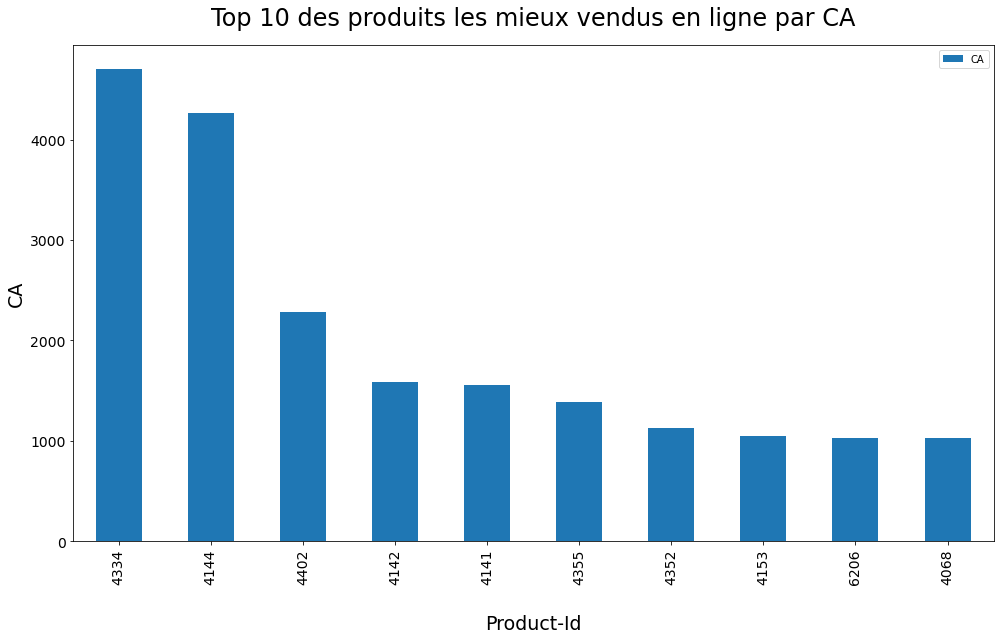

In [33]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

# Taille de la figure

fs = 14

# Traçage de la courbe

Q1_Rep_Top.plot.bar(figsize=(fs,fs-5))

# Customisation du graphique

plt.xlabel(u"Product-Id", fontsize = fs + 5, labelpad= 30)
plt.ylabel(u"CA", fontsize = fs + 5)
plt.title(u"Top 10 des produits les mieux vendus en ligne par CA", fontsize = fs + 10, pad= 20)

# Pour les labels

X_axis = [Q1_Rep_Top.index[i][0] for i in range(Top)]
X_axis2 = [f"Product_Id {X_axis[i]}" for i in range(Top)]
YQ1 = Q1_Rep_Top["CA"].values

plt.xticks(np.arange(Top), X_axis)  # Set text labels.
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()


# Question 2: Le total du CA réalisé en ligne

In [34]:
# CA total = Somme des CA pour chaque produit

Q2_Rep = Q1_merge2[["CA"]].sum()

print(f" Le CA total est de {Q2_Rep[0].round(2)} euros")

# J'ai considéré que les prix étaient en euros

 Le CA total est de 70568.6 euros


In [35]:
# Pour mettre un nom plus explicite et le réutiliser plus tard

CA_global = Q2_Rep[0].round(2)
CA_global

70568.6

# Question 3: Analyse du prix des produits => outliers ...

In [36]:
# Question 3: Troisièmement et pour finir, je me demande s’il n’y a pas eu des erreurs de saisie dans certains prix
# des produits. J'aimerais que tu effectues une analyse sur cette variable afin de détecter d’éventuelles valeurs
# aberrantes, de les lister et d’en faire une représentation graphique pour plus de lisibilité.

In [37]:
# C'est une colonne sur le dataframe Erp: "price" => "prix"
# Pour info il s'agit d'une variable quantitative

# Je vais considérer que son unité est en euros

Erp.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
5,4040,1,34.3,0,outofstock
6,4041,1,32.7,15,instock
7,4042,1,31.2,34,instock
8,4043,1,60.0,12,instock
9,4045,1,42.6,66,instock


In [38]:
# Regardons s'il y a des Nan dans cette colonne déjà

Masque_Price_nan = Erp["price"].isna()
Test_Nan_Erp = Erp["price"][Masque_Price_nan]
Test_Nan_Erp.count()

0

In [39]:
if Test_Nan_Erp.count() > 0:
    print("ATTENTION il y a Nan dans la colonne 'price' ! ")
else:
    print("Il n'y a pas de 'Nan' dans la colonne 'Price' ")

Il n'y a pas de 'Nan' dans la colonne 'Price' 


# Analyse Globale

In [40]:
Describe_Erp = Erp["price"].describe()

Mode_Erp = Erp["price"].mode()[0]
Describe_Erp

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [41]:
print(f"Le dataframe Erp sur la variable 'price' possède {int(Describe_Erp[0])} valeurs, la moyenne des prix unitaires est de {Describe_Erp[1].round(2)} €, la médiane est de {Describe_Erp[5]} €, le mode est de {Mode_Erp} € avec un minimum de {Describe_Erp[3]} € et un maximum de {Describe_Erp[7]} € ")

Le dataframe Erp sur la variable 'price' possède 825 valeurs, la moyenne des prix unitaires est de 32.42 €, la médiane est de 24.4 €, le mode est de 45.0 € avec un minimum de 5.2 € et un maximum de 225.0 € 


# Représentation la distribution globale des valeurs

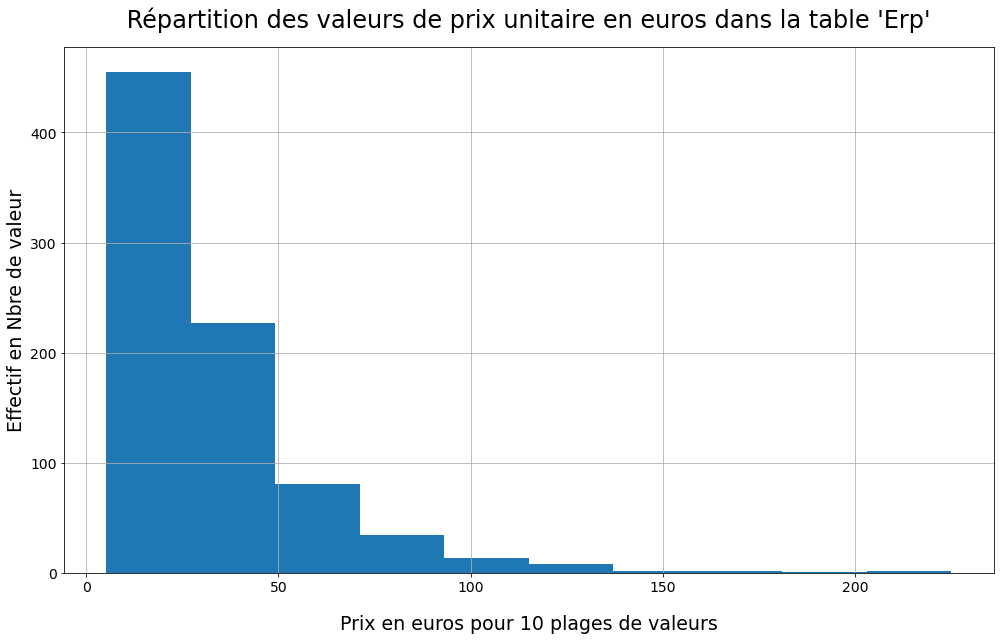

In [42]:
# Traçons des graphiques récapitulatifs

# Analyse globale de la répartition des valeurs

# Taille de la figure

fs = 14

# Nbre optimal de classe d'agrégation
# D'après le cours le nombre de Sturges k = 1 + log2(n) => log 2 est le logarithme en base 2

import math

X_price = Erp["price"]

k = int(1 + math.log(X_price.count(),2))


# Traçage de la courbe

Erp["price"].hist(bins = k, figsize=(fs,fs-5))

# Customisation du graphique

plt.xlabel(u"Prix en euros pour 10 plages de valeurs", fontsize = fs + 5, labelpad= 20)
plt.ylabel(u" Effectif en Nbre de valeur ", fontsize = fs + 5)
plt.title(u" Répartition des valeurs de prix unitaire en euros dans la table 'Erp' ", fontsize = fs + 10, pad= 20)

# Pour les labels

plt.xticks(np.arange(0, max(Erp["price"])+ 5, step=50), fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()




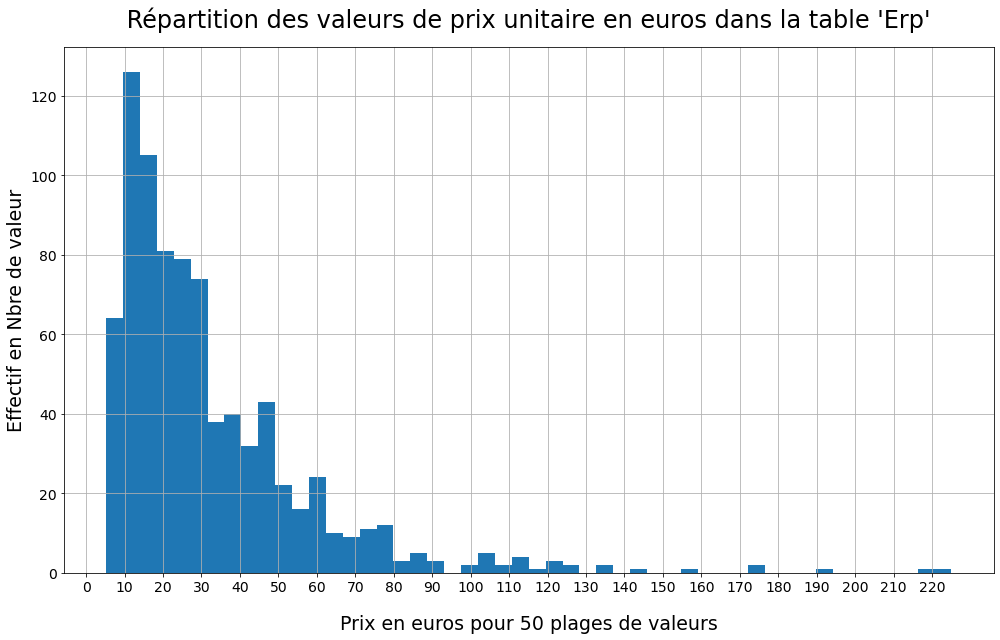

In [43]:
# Traçons des graphiques récapitulatifs avec une analyse plus fine

# Analyse globale de la répartition des valeurs

# Taille de la figure

fs = 14

# Avec une analyse plus fine => Plus de plage d'agrégation

k = 50

# Traçage de la courbe

Erp["price"].hist(bins = k, figsize=(fs,fs-5))

# Customisation du graphique

plt.xlabel(u"Prix en euros pour 50 plages de valeurs", fontsize = fs + 5, labelpad= 20)
plt.ylabel(u" Effectif en Nbre de valeur ", fontsize = fs + 5)
plt.title(u" Répartition des valeurs de prix unitaire en euros dans la table 'Erp' ", fontsize = fs + 10, pad= 20)

# Pour les labels

plt.xticks(np.arange(0, max(Erp["price"])+ 5, step=10), fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()

In [44]:
print(f"Le dataframe Erp sur la variable 'price' possède {int(Describe_Erp[0])} valeurs, la moyenne des prix unitaires est de {Describe_Erp[1].round(2)} €, la médiane est de {Describe_Erp[5]} €, le mode est de {Mode_Erp} € avec un minimum de {Describe_Erp[3]} € et un maximum de {Describe_Erp[7]} € ")

Le dataframe Erp sur la variable 'price' possède 825 valeurs, la moyenne des prix unitaires est de 32.42 €, la médiane est de 24.4 €, le mode est de 45.0 € avec un minimum de 5.2 € et un maximum de 225.0 € 


# Analyse de Dispersion

In [45]:
# Regardons l'écart-type => La dispersion moyenne autour de la moyenne
# Il avait déjà été calculé grâce à la fonction describe => c'est le std

Describe_Erp

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [46]:
print(f" L'écart-type est de {Describe_Erp[2].round(2)} €, il s'agit d'une valeur plutôt élevée d'écart moyen autour de la moyenne ce qui indique une grande dispersion autour de la moyenne")

 L'écart-type est de 26.8 €, il s'agit d'une valeur plutôt élevée d'écart moyen autour de la moyenne ce qui indique une grande dispersion autour de la moyenne


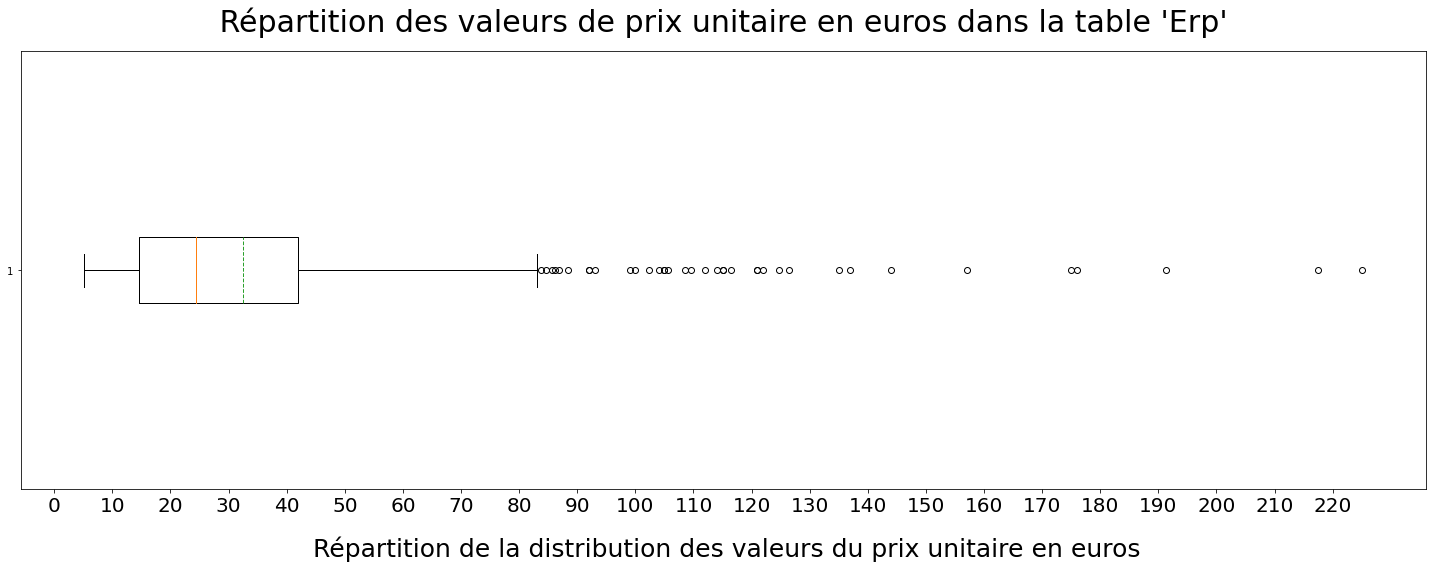

In [47]:
# Traçage des quartiles et identification des outliers gràce à la boîte à moustache

# Taille de la figure

fs = 20

plt.figure(figsize=(fs, fs-12))

# Avec une analyse plus fine => Plus de plage d'agrégation

k = 50

# Traçage de la courbe

plt.boxplot(Erp["price"], meanline = True, showmeans= True,  vert = False)

# Customisation du graphique

plt.xlabel(u" Répartition de la distribution des valeurs du prix unitaire en euros", fontsize = fs + 5, labelpad= 20)
plt.title(u" Répartition des valeurs de prix unitaire en euros dans la table 'Erp' ", fontsize = fs + 10, pad= 20)

# Pour les labels

plt.xticks(np.arange(0, max(Erp["price"])+ 5, step=10), fontsize=fs)

plt.tight_layout()




In [48]:
# Pour rappel

Describe_Erp

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [49]:
Ecart_Interquartile = Describe_Erp[6]-Describe_Erp[4]
Ecart_Interquartile

27.4

In [50]:
Moustache_Droite = Describe_Erp[6] + 1.5*Ecart_Interquartile
Moustache_Droite

# C'est la position de l'extrémité de la moustache droite

83.1

In [51]:
# Voici toutes les valeurs abberrantes

Masque_Outliers = Erp["price"]>83.1
Outliers_Price = Erp[Masque_Outliers]
Outliers_Price

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,0,outofstock
66,4115,1,100.0,11,instock
68,4132,1,88.4,5,instock
208,4352,1,225.0,0,outofstock
210,4355,1,126.5,2,instock
214,4359,1,85.6,0,outofstock
227,4402,1,176.0,8,instock
228,4404,1,108.5,2,instock
230,4406,1,157.0,3,instock
231,4407,1,104.0,6,instock


# Regardons les outliers

In [52]:
Nbre_Outliers_Price = Outliers_Price.count()[0]

print(f"Il y a {Nbre_Outliers_Price} outliers sur le prix unitaire")

Il y a 37 outliers sur le prix unitaire


In [53]:
# Voyons si ces product_id concernés sont influent sur le CA

print(f" Le CA total est de {CA_global} euros avec les outliers ")

# Sans les outliers

# Reprenons la méthode de la question 1

# Pour rappel de Q1_merge1 et Q1 merge2

Q1_merge1 = pd.merge(Web3,Liaison2, on="SKU", how="left")
Q1_merge1.head(5)


 Le CA total est de 70568.6 euros avec les outliers 


,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954.0
1,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,4729.0
2,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4634.0
3,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4141.0
4,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,5932.0


In [54]:
Q1_merge2 = pd.merge(Q1_merge1,Erp, on="product_id", how="left")
Q1_merge2.head(5)

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954.0,1.0,25.0,0.0,instock
1,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,4729.0,1.0,8.6,151.0,instock
2,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4634.0,1.0,41.0,4.0,instock
3,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4141.0,1.0,39.0,1.0,instock
4,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,5932.0,1.0,59.9,3.0,instock


In [55]:
# A la place de Q1_merge2 => On va faire un merge en utilisant la table Erp mais sans les outliers 

Erp_Sans_Outliers_Price = Erp[-Masque_Outliers]

Q1_merge2_sans_outliers = pd.merge(Q1_merge1,Erp_Sans_Outliers_Price, on="product_id", how="left")
Q1_merge2_sans_outliers.head(5)

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954.0,1.0,25.0,0.0,instock
1,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,4729.0,1.0,8.6,151.0,instock
2,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4634.0,1.0,41.0,4.0,instock
3,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4141.0,1.0,39.0,1.0,instock
4,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,5932.0,1.0,59.9,3.0,instock


In [56]:
# Maintenant faisons le calcul du CA pour chaque ligne et un group by par produit

Q1_merge2_sans_outliers["CA"] = Q1_merge2_sans_outliers["total_sales"]*Q1_merge2_sans_outliers["price"]
Q1_merge2_sans_outliers.head(5)

,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type,product_id,onsale_web,price,stock_quantity,stock_status,CA
0,1,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product,4954.0,1.0,25.0,0.0,instock,250.0
1,38,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,2018-04-18 10:25:58,Emile Boeckel Crémant Brut Blanc de Blancs,"Ce Crémant est vif et délicat, gourmand et cro...",emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,4729.0,1.0,8.6,151.0,instock,326.8
2,41,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,2018-04-14 10:01:43,Marcel Windholtz Eau de Vie de Marc de Gewurzt...,Les eaux de vie naissent d'une subtile alchimi...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4634.0,1.0,41.0,4.0,instock,0.0
3,304,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,2018-02-13 11:57:44,Champagne Gosset Grande Réserve,"Le nez, ouvert et expressif, évoque les fruits...",gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,https://www.bottle-neck.fr/?post_type=product&...,product,4141.0,1.0,39.0,1.0,instock,1560.0
4,523,0.0,taxable,NaN,2.0,2019-04-06 15:25:58,2019-04-06 13:25:58,Cognac Normandin Mercier VFC,Issus des meilleurs crus de Grande et de Petit...,cognac-normandin-mercier-vfc,2020-08-12 16:45:03,2020-08-12 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,5932.0,1.0,59.9,3.0,instock,0.0


In [57]:
# Voyons le CA global sans outliers

CA_global_sans_outliers_price = Q1_merge2_sans_outliers["CA"].sum().round(2)
CA_global_sans_outliers_price

63598.6

In [58]:
Diff_CA_Avec_Sans_Outliers_Price = CA_global - CA_global_sans_outliers_price
Rapport_Avec_Sans_Outliers = (Diff_CA_Avec_Sans_Outliers_Price*100) / CA_global

print(f" Il y a une différence entre le CA avec les outliers et sans les outliers de {Diff_CA_Avec_Sans_Outliers_Price.round(2)} € => donc les outliers représentent {Rapport_Avec_Sans_Outliers.round(2)} % du CA_global avec les outliers")

 Il y a une différence entre le CA avec les outliers et sans les outliers de 6970.0 € => donc les outliers représentent 9.88 % du CA_global avec les outliers


In [59]:
# Pour rappel voici avec les outliers le top 10 des produits les mieux vendus en CA

Q1_Rep_Top

,,CA
product_id,SKU,
4334,7818,4704.0
4144,1662,4263.0
4402,3510,2288.0
4142,11641,1590.0
4141,304,1560.0
4355,12589,1391.5
4352,15940,1125.0
4153,16237,1044.0
6206,16580,1033.2


In [60]:
# Voici leur product_id

Top_10_product_id_CA = [Q1_Rep_Top.index[i][0] for i in range(10)]
Top_10_product_id_CA

[4334, 4144, 4402, 4142, 4141, 4355, 4352, 4153, 6206, 4068]

In [61]:
# On possède la liste des Outliers

Outliers_Price.head(5)


,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,0,outofstock
66,4115,1,100.0,11,instock
68,4132,1,88.4,5,instock
208,4352,1,225.0,0,outofstock
210,4355,1,126.5,2,instock


In [62]:
Product_Id_Outliers = Outliers_Price["product_id"]
Product_Id_Outliers.head(5)

19     4055
66     4115
68     4132
208    4352
210    4355
Name: product_id, dtype: int64

In [63]:
# On va prendre les numéros en communs dans les 2 listes grâce à la fonction intersection

Test_Intersection_Product_Id = set(Product_Id_Outliers).intersection(Top_10_product_id_CA)
Test_Intersection_Product_Id


{4352, 4355, 4402}

In [64]:
# Je vais le mettre sous forme de liste

Test_Intersection_Product_Id = list(Test_Intersection_Product_Id)
Test_Intersection_Product_Id

[4352, 4402, 4355]

In [65]:
# Voici les outliers

Outliers_pb = []

for i in range(len(Test_Intersection_Product_Id)):
    Outliers_pb.append(Test_Intersection_Product_Id[i])

Outliers_pb


[4352, 4402, 4355]

In [66]:
Q1_Rep_Top

,,CA
product_id,SKU,
4334,7818,4704.0
4144,1662,4263.0
4402,3510,2288.0
4142,11641,1590.0
4141,304,1560.0
4355,12589,1391.5
4352,15940,1125.0
4153,16237,1044.0
6206,16580,1033.2


In [67]:
# Voyons la description des Outliers

Outliers_Price.head(10)

,product_id,onsale_web,price,stock_quantity,stock_status
19,4055,0,86.1,0,outofstock
66,4115,1,100.0,11,instock
68,4132,1,88.4,5,instock
208,4352,1,225.0,0,outofstock
210,4355,1,126.5,2,instock
214,4359,1,85.6,0,outofstock
227,4402,1,176.0,8,instock
228,4404,1,108.5,2,instock
230,4406,1,157.0,3,instock
231,4407,1,104.0,6,instock


In [68]:
Outliers_Description_merge1 = pd.merge(Outliers_Price,Liaison2, on='product_id',how='left')
Outliers_Description_merge1.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,SKU
0,4055,0,86.1,0,outofstock,0
1,4115,1,100.0,11,instock,15382
2,4132,1,88.4,5,instock,11668
3,4352,1,225.0,0,outofstock,15940
4,4355,1,126.5,2,instock,12589


In [69]:
Outliers_Description_merge2 = pd.merge(Outliers_Description_merge1,Web3, on='SKU',how='left')
Outliers_Description_merge2.head(5)

,product_id,onsale_web,price,stock_quantity,stock_status,SKU,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_name,post_modified,post_modified_gmt,guid,post_type
0,4055,0,86.1,0,outofstock,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4115,1,100.0,11,instock,15382,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,2018-02-13 10:08:45,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f...",zind-humbrecht-riesling-gc-rangen-thann-clos-s...,2020-02-08 11:45:02,2020-02-08 10:45:02,https://www.bottle-neck.fr/?post_type=product&...,product
2,4132,1,88.4,5,instock,11668,0.0,taxable,NaN,2.0,2018-02-13 11:43:55,2018-02-13 10:43:55,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...,zind-humbrecht-pinot-gris-grand-cru-rangen-de-...,2020-02-20 09:55:02,2020-02-20 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,product
3,4352,1,225.0,0,outofstock,15940,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,product
4,4355,1,126.5,2,instock,12589,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product


In [70]:
Description_Outliers = Outliers_Description_merge2[["product_id","SKU","price","post_title","post_excerpt"]]
Description_Outliers.head(5)

# Voici la description des bouteilles de vin

# Remarque on voit que pour la première ligne il y a pleins de Nan car le SKU est de 0 cad confère 
# le traitement de la table Liaison 2. => Un lien entre le product_id et le SKU que Sylvie n'a pas pu faire !!!


,product_id,SKU,price,post_title,post_excerpt
0,4055,0,86.1,NaN,NaN
1,4115,15382,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,"Le nez est puissant, dominant, riche, sur la f..."
2,4132,11668,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,Le nez dévoile déjà une belle intensité de fru...
3,4352,15940,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...
4,4355,12589,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...


In [71]:
# Prenons maintenant les 3 Outliers qui sont dans le Top 10 des produits les plus vendus

Masque_Outliers_pb_1 = Description_Outliers["product_id"]==Outliers_pb[0]
Masque_Outliers_pb_2 = Description_Outliers["product_id"]==Outliers_pb[1]
Masque_Outliers_pb_3 = Description_Outliers["product_id"]==Outliers_pb[2]

In [72]:
Description_Outliers[Masque_Outliers_pb_1 | Masque_Outliers_pb_2 | Masque_Outliers_pb_3]

,product_id,SKU,price,post_title,post_excerpt
3,4352,15940,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...
4,4355,12589,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...
6,4402,3510,176.0,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...


# Prenons les données 'price' sans les Outliers

In [73]:
Erp_Sans_Outliers_Price["price"].describe()

count    788.000000
mean      28.256472
std       17.523618
min        5.200000
25%       14.275000
50%       23.400000
75%       39.000000
max       83.000000
Name: price, dtype: float64

In [74]:
Erp["price"].describe()

count    825.000000
mean      32.415636
std       26.795849
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

# Analyse de Forme

In [75]:
# regardons d'après le cours le skewness empirique et le Kurtosis pour mesurer la symétrie et l'aplatissement par rapport à la gaussienne classique

Skew_Sans_Outliers = Erp_Sans_Outliers_Price["price"].skew()
Kurtosis_Sans_Outliers = Erp_Sans_Outliers_Price["price"].kurtosis()

print(Skew_Sans_Outliers.round(2))
print(Kurtosis_Sans_Outliers.round(2))


1.0
0.29


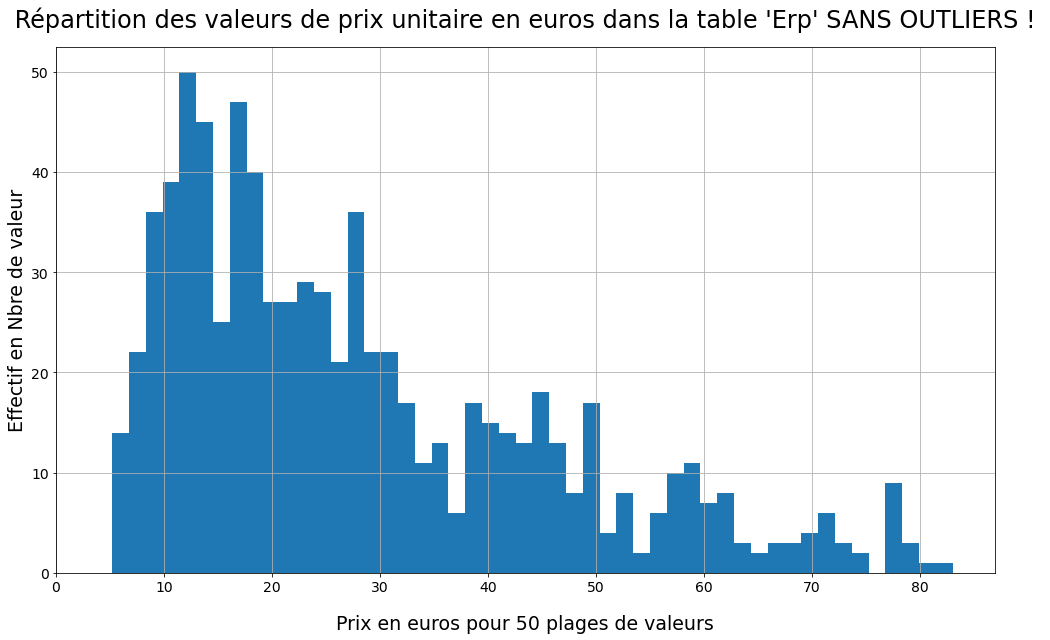

In [76]:
# En effet

# Taille de la figure

fs = 14

# Avec une analyse plus fine => Plus de plage d'agrégation

k = 50

# Traçage de la courbe

Erp_Sans_Outliers_Price["price"].hist(bins = k, figsize=(fs,fs-5))

# Customisation du graphique

plt.xlabel(u"Prix en euros pour 50 plages de valeurs", fontsize = fs + 5, labelpad= 20)
plt.ylabel(u" Effectif en Nbre de valeur ", fontsize = fs + 5)
plt.title(u" Répartition des valeurs de prix unitaire en euros dans la table 'Erp' SANS OUTLIERS ! ", fontsize = fs + 10, pad= 20)

# Pour les labels

plt.xticks(np.arange(0, max(Erp_Sans_Outliers_Price["price"])+ 5, step=10), fontsize=fs)
plt.yticks(fontsize=fs)

plt.tight_layout()

# Bonus les SKUs ayant la valeur 0

In [77]:
Masque_SKU_0 = Liaison2["SKU"]==0
Liaison2_SKU_0 = Liaison2[Masque_SKU_0]
Liaison2_SKU_0.count()

product_id    91
SKU           91
dtype: int64

In [78]:
Liste_product_id_isole = Liaison2_SKU_0["product_id"]
Liste_product_id_isole

19     4055
49     4090
50     4092
119    4195
131    4209
       ... 
817    7196
818    7200
819    7201
820    7203
821    7204
Name: product_id, Length: 91, dtype: int64

In [79]:
Bonus = pd.merge(Erp,Liste_product_id_isole, on='product_id', how='inner')
Bonus

,product_id,onsale_web,price,stock_quantity,stock_status
0,4055,0,86.1,0,outofstock
1,4090,0,73.0,0,outofstock
2,4092,0,47.0,0,outofstock
3,4195,0,14.1,0,outofstock
4,4209,0,73.5,0,outofstock
...,...,...,...,...,...
86,7196,0,31.0,55,instock
87,7200,0,31.0,6,instock
88,7201,0,31.0,18,instock
89,7203,0,45.0,30,instock


In [80]:
# Si on a vendu que un objet par produit

CA_manquant_pour_1_produit = Bonus["price"].sum()
CA_manquant_pour_1_produit

3095.7

In [81]:
Ratio_CA_Manquant = 100*CA_manquant_pour_1_produit/(CA_manquant_pour_1_produit + CA_global_sans_outliers_price)
Ratio_CA_Manquant.round(2)

4.64

In [82]:
# Si on vend x produit

def Ratio_CA_Manquant_x_produit(xproduit):
    CA_manquant_pour_x_produit = (Bonus["price"]*xproduit).sum()
    Ratio_CA_Manquant = (100*CA_manquant_pour_x_produit/(CA_manquant_pour_x_produit + CA_global_sans_outliers_price)).round(2)
    print(Ratio_CA_Manquant)
    return(Ratio_CA_Manquant)

In [83]:
Ratios_CA_Manquant_xproduits = []

for i in range(20):
    Ratios_CA_Manquant_xproduits.append(Ratio_CA_Manquant_x_produit(i))

0.0
4.64
8.87
12.74
16.3
19.57
22.6
25.41
28.03
30.46
32.74
34.87
36.87
38.75
40.53
42.2
43.78
45.28
46.7
48.05


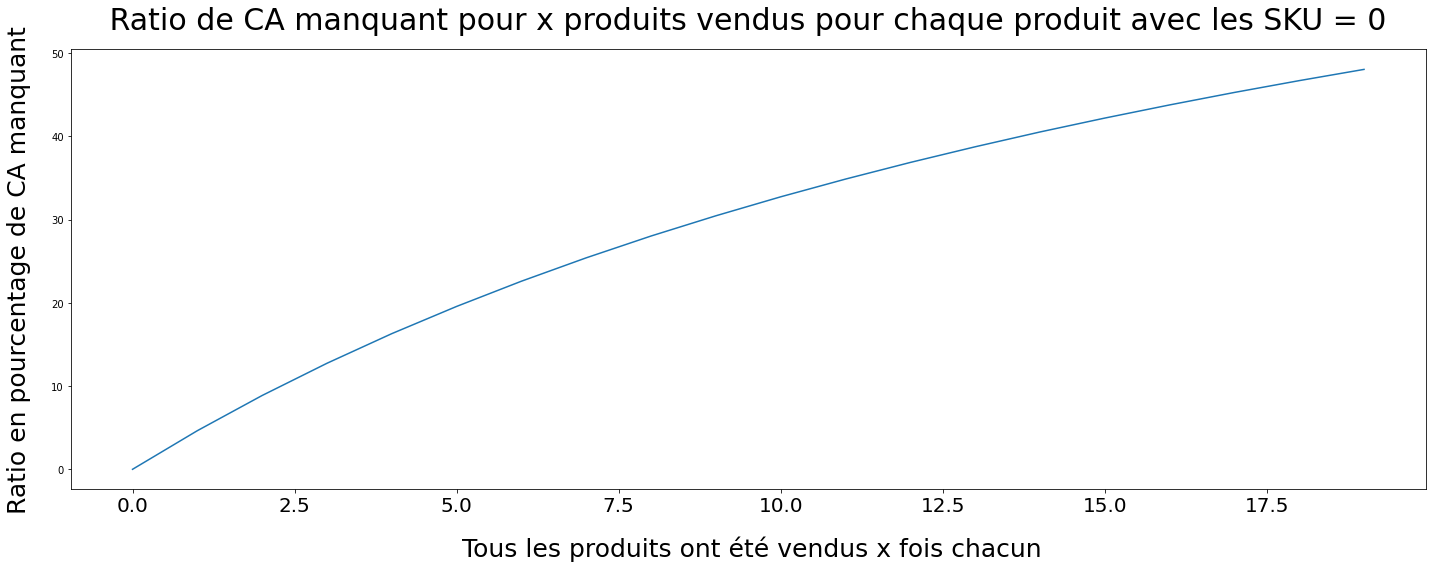

In [84]:
# Ratio de CA manquant pour x produit vendu pour chaque produit

# Taille de la figure

fs = 20

plt.figure(figsize=(fs, fs-12))


# Traçage de la courbe

X = np.arange(20)

plt.plot(X,Ratios_CA_Manquant_xproduits)

# Customisation du graphique

plt.xlabel(u" Tous les produits ont été vendus x fois chacun", fontsize = fs + 5, labelpad= 20)
plt.ylabel(u" Ratio en pourcentage de CA manquant ", fontsize = fs + 5, labelpad= 20)
plt.title(u" Ratio de CA manquant pour x produits vendus pour chaque produit avec les SKU = 0 ", fontsize = fs + 10, pad= 20)

# Pour les labels

plt.xticks(fontsize=fs)

plt.tight_layout()


# Conclusion